# The Spark Foundation: Data Science And Business Analytics Tasks
<img src='./images/logo_small.png'>

## Task 1: Prediction using Supervised ML
#### Target: Predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

## Author: Ahmed Abdo Amin Abdo

## 📥 Import required libraries

In [21]:
#!pip2 install seaborn
#!pip3 install scikit-learn

In [67]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

## 🗃️ Load Dataset from remote link

In [6]:
# Reading data from remote link
urlData = "http://bit.ly/w-data"
studentData = pd.read_csv(urlData)
print("Data imported successfully")

studentData.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 📝 Meta information of Dataframe

In [7]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## <img src='./images/Statistical.png' align='left' width='45'> Show Statistical Analysis

In [8]:
studentData.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
studentData.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## 🔎 Check NaN values

In [9]:
studentData.isnull().sum()

Hours     0
Scores    0
dtype: int64

## <img src='./images/Visualization1.png' align='left' width='45'>  Visualize The data

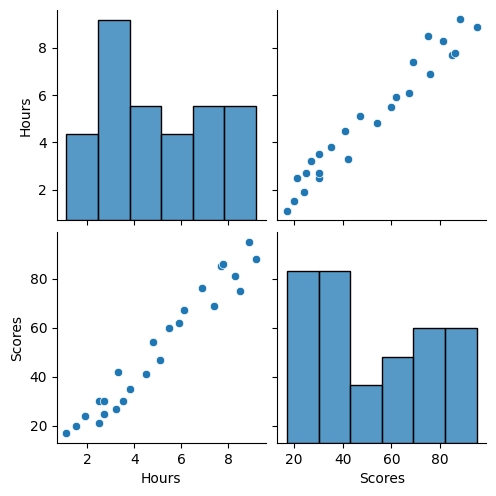

In [29]:
sns.pairplot(studentData)

## ✂️ Train & Test Split

In [23]:
# Divide the data into "attributes" (inputs => X) and "labels" (outputs => y).
X = studentData.iloc[:, :-1].values  
y = studentData.iloc[:, 1].values
# Split this data (X, y) into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

##  <img src='./images/Train-Model.png' align='left'> Train Regression Model

In [47]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


## <img src='./images/Visualize_model.png' align='left' width='45'>Visualize The Model

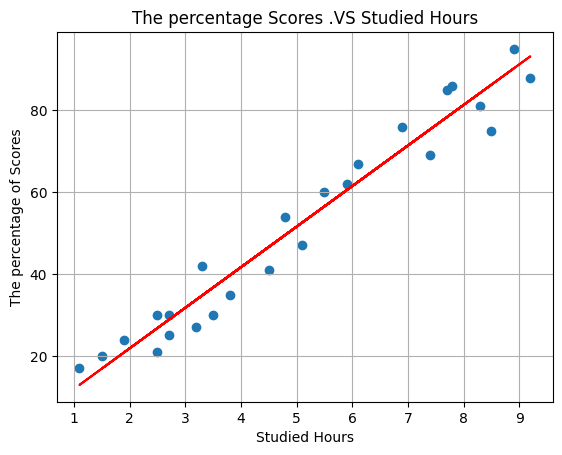

In [58]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,  label='Sample data')
plt.plot(X, line, label='Regression model', color='red')
plt.xlabel("Studied Hours")
plt.ylabel("The percentage of Scores")
plt.title("The percentage Scores .VS Studied Hours")
plt.grid()
plt.show()

## <img src='./images/Prediction.png' align='left' width='35'>Make Predictions

In [49]:
# Predicting the scores
y_pred = regressor.predict(X_test) 
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual (%)': y_test, 'Predicted (%)': y_pred})  
df

,Actual (%),Predicted (%)
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## <img src='./images/Question.png' align='left' width='35'> Question: What will be predicted score if a student studies for 9.25 hrs/ day?

In [66]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print(f"If a student studies for {hours} hrs/ day, his score will be {own_pred[0]}%")

If a student studies for 9.25 hrs/ day, his score will be 93.69173248737535%


## <img src='./images/Evaluate.png' align='left' width='35'>Evaluate The Model

In [73]:
print(f'Mean Absolute Error:{metrics.mean_absolute_error(y_test, y_pred)}') 
print(f'Mean Squared Error:{metrics.mean_squared_error(y_test, y_pred)}')

Mean Absolute Error:4.183859899002975
Mean Squared Error:21.598769307217406
